In [1]:
import pandas as  pd 
import numpy as np 
import warnings 
warnings.filterwarnings("ignore")  
import seaborn as sns  
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error 

In [2]:
train=pd.read_csv('./dataset/train.csv')

In [3]:
train.head()

,ID_Date,StateCode,StationId,Date,PM2.5,PM10,O3,CO,SO2,AQI
0,AS_4_2021-08-17,AS,4,2021-08-17,51.8364,120.3702,18.0234,0.4896,14.3106,94.0
1,AS_4_2021-08-18,AS,4,2021-08-18,59.4762,87.0978,34.5270,0.4794,14.7594,124.0
2,AS_4_2021-08-19,AS,4,2021-08-19,61.0776,79.6008,42.0546,0.5202,16.7484,82.0
3,AS_4_2021-08-20,AS,4,2021-08-20,56.7222,94.2072,45.7878,0.4998,27.6114,107.0
4,AS_4_2021-08-21,AS,4,2021-08-21,85.3332,136.7820,44.5638,1.1118,26.4180,107.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25340 entries, 0 to 25339
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID_Date    25340 non-null  object 
 1   StateCode  25340 non-null  object 
 2   StationId  25340 non-null  int64  
 3   Date       25340 non-null  object 
 4   PM2.5      25339 non-null  float64
 5   PM10       25338 non-null  float64
 6   O3         25324 non-null  float64
 7   CO         25339 non-null  float64
 8   SO2        25340 non-null  float64
 9   AQI        25340 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.9+ MB


In [5]:
train.isnull().sum()

ID_Date       0
StateCode     0
StationId     0
Date          0
PM2.5         1
PM10          2
O3           16
CO            1
SO2           0
AQI           0
dtype: int64

In [7]:
train['PM2.5'].fillna(train['PM2.5'].mean(),inplace=True) 
train['PM10'].fillna(train['PM10'].mean(),inplace=True) 
train['O3'].fillna(train['O3'].mean(),inplace=True) 
train['CO'].fillna(train['CO'].mean(),inplace=True) 

<Axes: >

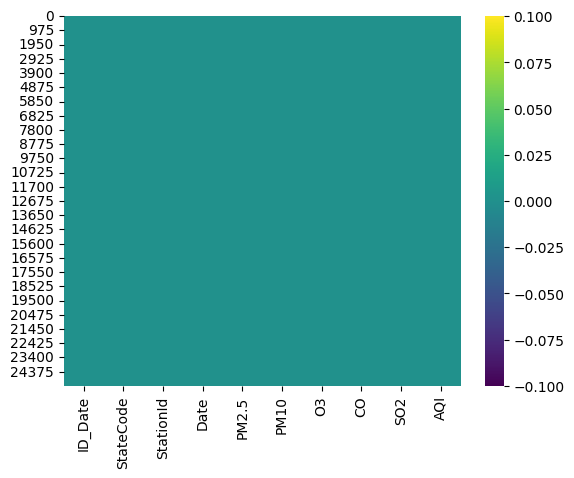

In [9]:
sns.heatmap(train.isnull(),cmap='viridis',cbar=True)

In [10]:
train.describe()

,StationId,PM2.5,PM10,O3,CO,SO2,AQI
count,25340.000000,25340.000000,25340.000000,25340.000000,25340.000000,25340.000000,25340.000000
mean,19.700552,84.722233,176.876226,36.328698,1.135535,12.531818,190.841555
std,11.000809,80.603667,131.998470,23.349097,0.759955,8.917706,127.643584
min,4.000000,0.199500,0.220500,0.052500,0.000000,0.010500,14.000000
25%,11.000000,30.280000,73.754650,18.655800,0.612000,6.293400,91.000000
50%,16.000000,58.028900,142.532200,31.980000,0.969000,10.830000,152.000000
75%,29.000000,109.163250,247.206000,49.592400,1.459500,16.605600,276.000000
max,41.000000,935.003400,1020.000000,194.146800,8.863800,166.943400,975.000000


# EXPLORATORY DATA ANALYSIS 

array([[<Axes: title={'center': 'StationId'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>],
       [<Axes: title={'center': 'O3'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'AQI'}>, <Axes: >, <Axes: >]],
      dtype=object)

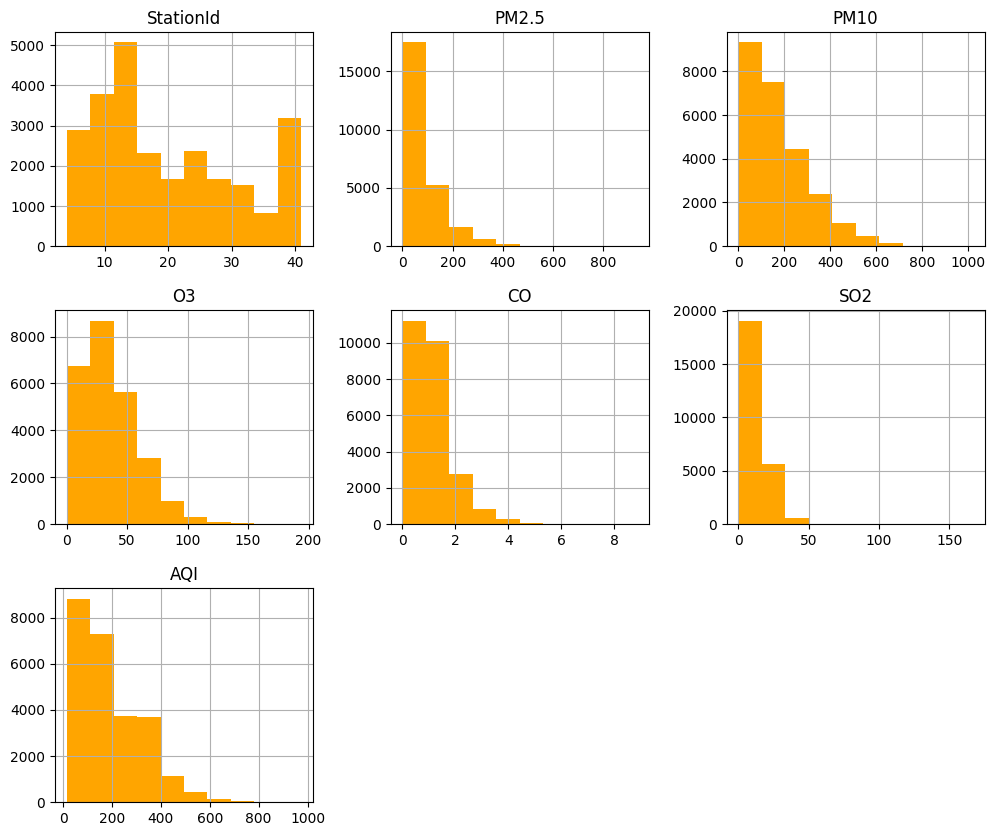

In [14]:
train.hist(bins=10,color='Orange',figsize=(12,10))

In [14]:
State=train.groupby("StateCode")[["PM2.5","PM10","O3","CO","SO2"]].mean().round()
State

,PM2.5,PM10,O3,CO,SO2
StateCode,,,,,
AS,69.0,126.0,26.0,1.0,15.0
DL,109.0,227.0,37.0,1.0,15.0
KA,33.0,75.0,40.0,1.0,6.0
MH,40.0,97.0,27.0,1.0,11.0
TN,29.0,61.0,48.0,1.0,9.0
WB,65.0,122.0,32.0,1.0,9.0


In [16]:
# ANALYSIS OF CITIES WITH DIFFERENT LEVELS

<Axes: title={'center': 'Parameters Levels in different cities'}, xlabel='Level', ylabel='City'>

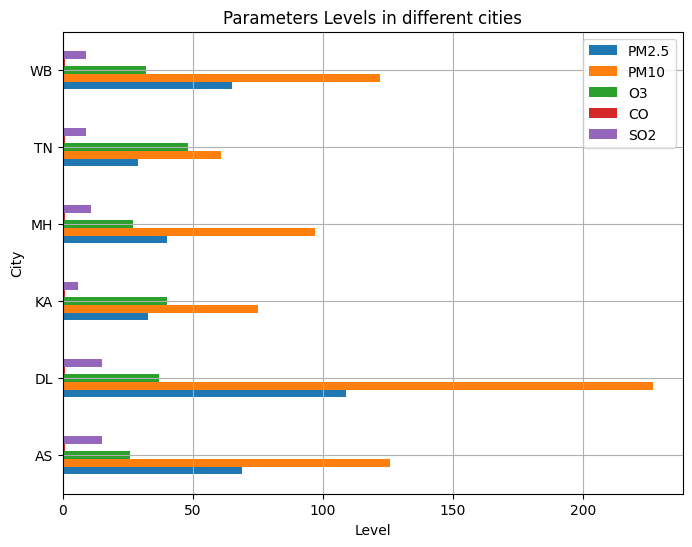

In [21]:
State.plot(figsize=(8,6),kind="barh",title="Parameters Levels in different cities",
                                                xlabel="Level", ylabel="City",grid=True)

Text(0, 0.5, 'PM2.5 & PM10')

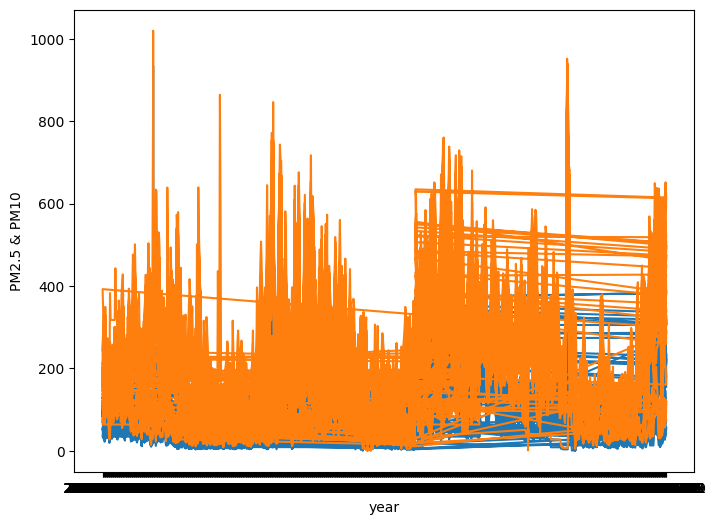

In [29]:
plt.figure(figsize=(8,6))
plt.plot(train['Date'],train[['PM2.5','PM10']]) 
plt.xlabel('year')
plt.ylabel('PM2.5 & PM10')

<Axes: xlabel='StateCode', ylabel='PM2.5'>

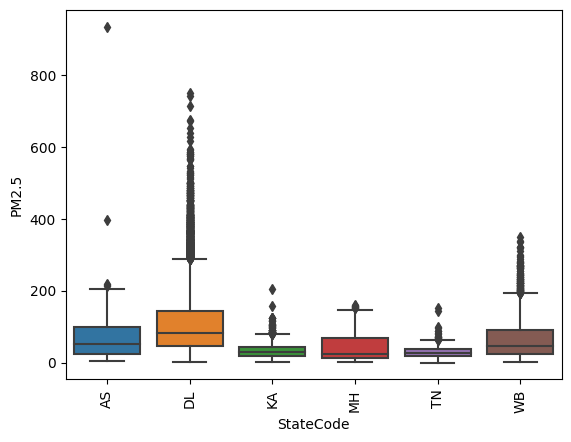

In [32]:
plt.xticks(rotation=90)
sns.boxplot(x="StateCode",y="PM2.5",data=train)

<Axes: xlabel='StateCode', ylabel='PM10'>

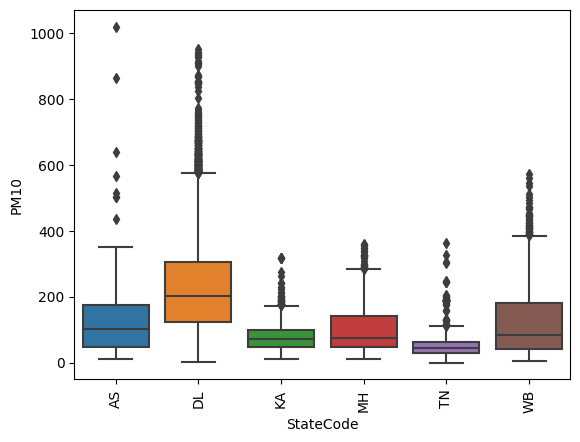

In [33]:
plt.xticks(rotation=90)
sns.boxplot(x="StateCode",y="PM10",data=train)

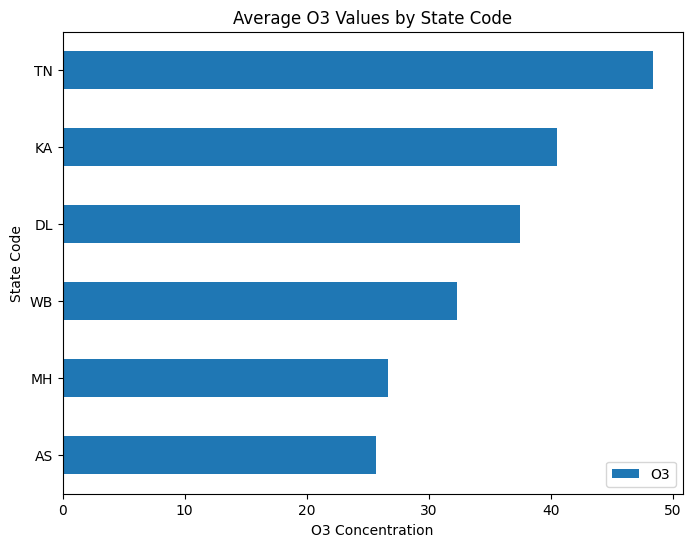

In [47]:
 
train[['O3','StateCode']].groupby(['StateCode']).mean().sort_values(by='O3').plot(kind='barh', figsize=(8,6))
plt.title('Average O3 Values by State Code')
plt.xlabel('O3 Concentration')
plt.ylabel('State Code') 
plt.show()

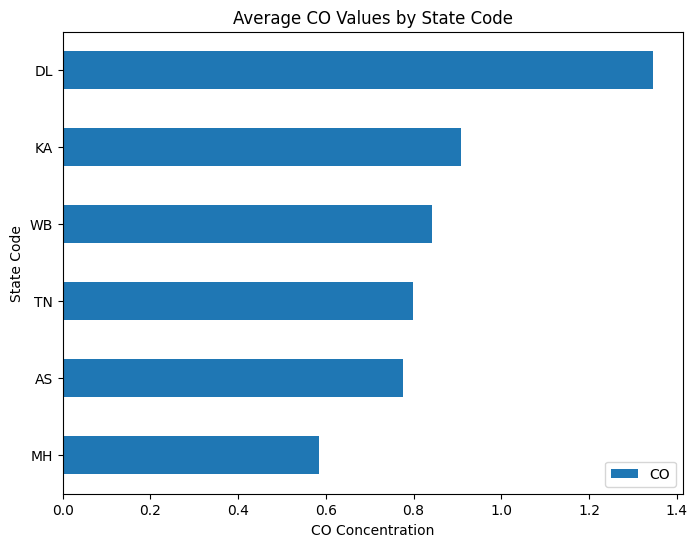

In [46]:
 
train[['CO','StateCode']].groupby(['StateCode']).mean().sort_values(by='CO').plot(kind='barh', figsize=(8,6))
plt.title('Average CO Values by State Code')
plt.xlabel('CO Concentration')
plt.ylabel('State Code')
plt.show()

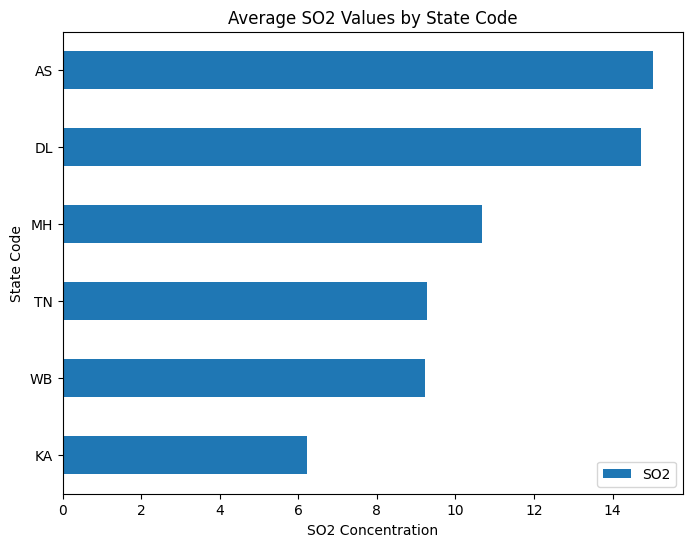

In [48]:
 
train[['SO2','StateCode']].groupby(['StateCode']).mean().sort_values(by='SO2').plot(kind='barh', figsize=(8,6))
plt.title('Average SO2 Values by State Code')
plt.xlabel('SO2 Concentration')
plt.ylabel('State Code')
plt.show()

<Axes: xlabel='year', ylabel='AQI'>

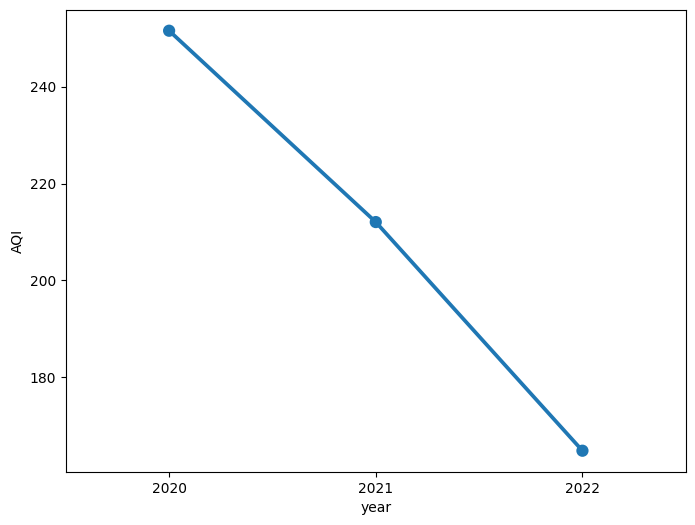

In [49]:
train['date'] = pd.to_datetime(train['Date'],format='%Y-%m-%d') # date parse
train['year'] = train['date'].dt.year # year
train['year'] = train['year'].astype(int)
train = train[(train['year']>0)]

df = train[['AQI','year']].groupby(["year"]).mean().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(8,6))
sns.pointplot(x='year', y='AQI', data=df)

In [50]:
df=train[['AQI','date']]
df['date']=pd.DatetimeIndex(df['date'])
df.tail(5)

,AQI,date
25335,47.0,2022-11-29
25336,52.0,2022-11-30
25337,41.0,2022-12-01
25338,40.0,2022-12-02
25339,48.0,2022-12-03


In [51]:
df=df.set_index('date').resample('M')["AQI"].mean()
df.head()

date
2020-08-31    315.703704
2020-09-30    253.896667
2020-10-31    254.129787
2020-11-30    233.421875
2020-12-31    211.076763
Freq: M, Name: AQI, dtype: float64

In [52]:
#preprocessing the data values
train=df.reset_index(level=0, inplace=False)
train= train[np.isfinite(train['AQI'])]
train=train[train.date != '2020-08-02']
train = train.reset_index(drop=True)
train.head()

,date,AQI
0,2020-08-31,315.703704
1,2020-09-30,253.896667
2,2020-10-31,254.129787
3,2020-11-30,233.421875
4,2020-12-31,211.076763


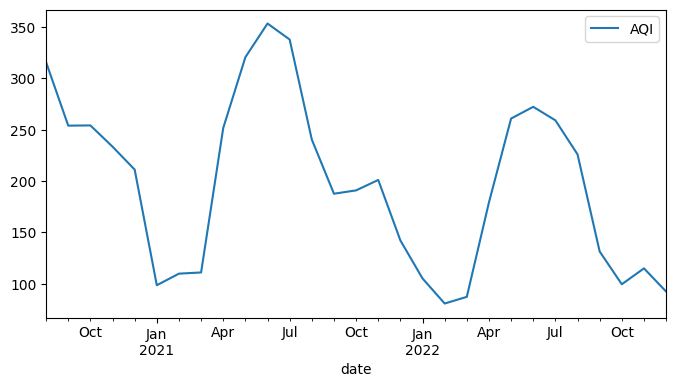

In [53]:
#visualizing the processed data of AQI
df=train.set_index('date')
df.sort_values(by='date',ascending=False)
df.plot(figsize=(8, 4))
plt.show()
y=df.AQI  

In [54]:
#exctracting knowledge about data
#spliting dataframes into test and train
train_size = int(len(train) * 0.85) # 80% of the data for training
test_size = len(train) - train_size 

for i in range(len(train) - train_size - test_size + 1):
    train_start = i
    train_end = i + train_size
    test_start = i + train_size
    test_end = i + train_size + test_size

# Extract the training and testing sets
    train_df = df.iloc[train_start:train_end]
    test_df = df.iloc[test_start:test_end]

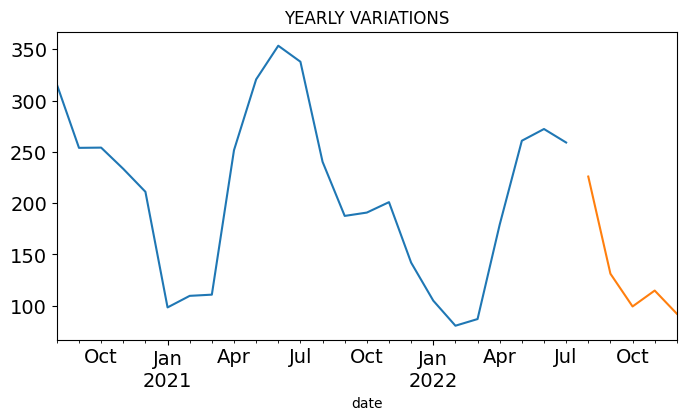

In [55]:
#plotting the yearly variations of AQI
train_df.AQI.plot(figsize=(8,4), title= 'YEARLY VARIATIONS', fontsize=14)
test_df.AQI.plot(figsize=(8,4), title= 'YEARLY VARIATIONS', fontsize=14)
plt.show()

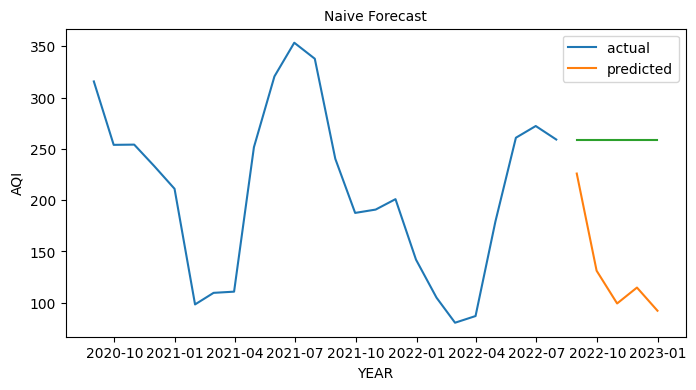

In [56]:
#Naive Forecast Approach to find the variations(trend)
dd= np.asarray(train_df.AQI)
y_hat = test_df.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(8,4))
plt.plot(train_df.index, train_df['AQI'], label='Train')
plt.plot(test_df.index,test_df['AQI'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast",fontsize=10)

plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=10)
plt.ylabel("AQI",fontsize=10)
plt.tick_params(labelsize=10)
plt.show()

In [57]:
from scipy import stats 
import statsmodels.api as sm 
from itertools import product

Text(0.5, 0, 'AQI')

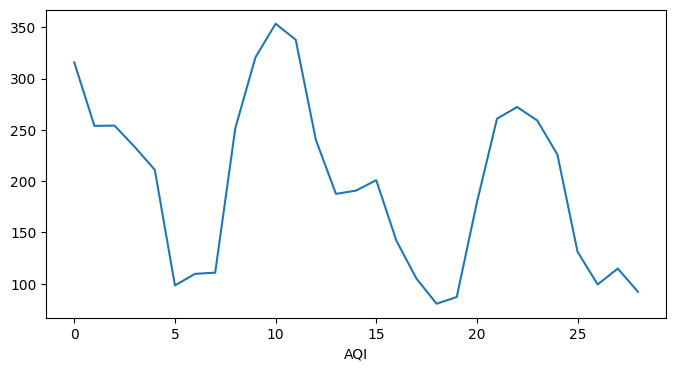

In [58]:
plt.rcParams['figure.figsize']=8,4

train['AQI'].plot() 
plt.xlabel('AQI')

In [59]:
# Convert index to DatetimeIndex
train_df.index = pd.to_datetime(train_df.index)

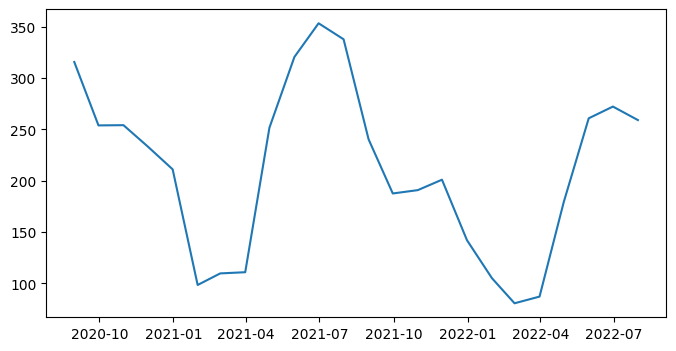

In [60]:
# Visualize time series data
plt.plot(train_df)
plt.show()

Dickey-Fuller criterion: p=0.927561


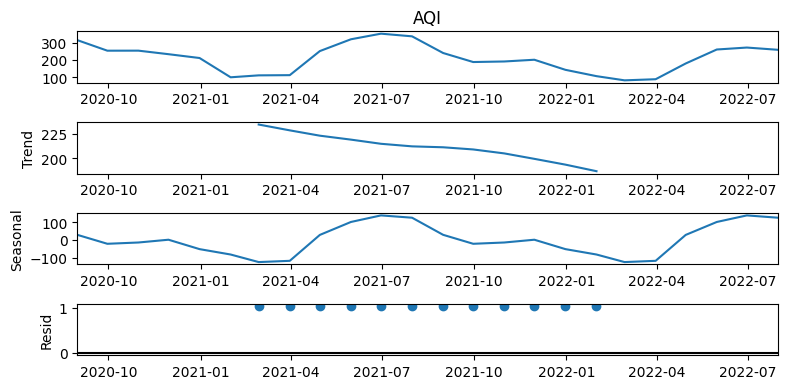

In [61]:
#Decompose time series into components
decomposition = sm.tsa.seasonal_decompose(train_df['AQI'], model='a') 
decomposition.plot();

print("Dickey-Fuller criterion: p=%f" % 
     sm.tsa.stattools.adfuller(train_df['AQI'])[1])

In [62]:
# THERE ARE NO STATIONARY POINTS IN THE DATA 

# MODEL SELECTION 

# ARIMA MODEL

                               SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -123.790
Date:                Thu, 04 May 2023   AIC                            253.580
Time:                        11:50:54   BIC                            256.986
Sample:                    08-31-2020   HQIC                           254.437
                         - 07-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3227      1.029      0.314      0.754      -1.693       2.339
ma.L1          0.1103      1.050      0.105      0.916      -1.947       2.168
sigma2      2744.5962    791.445      3.468      0.0

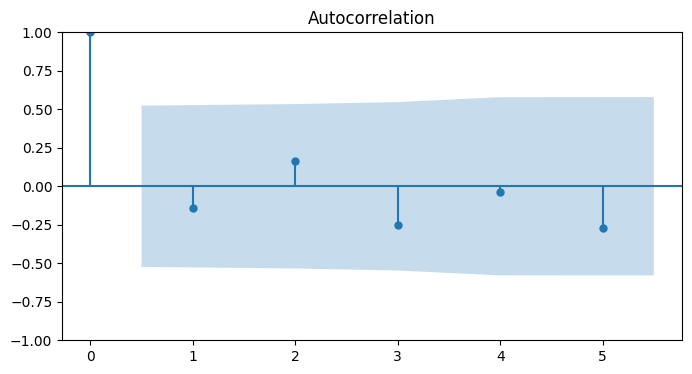

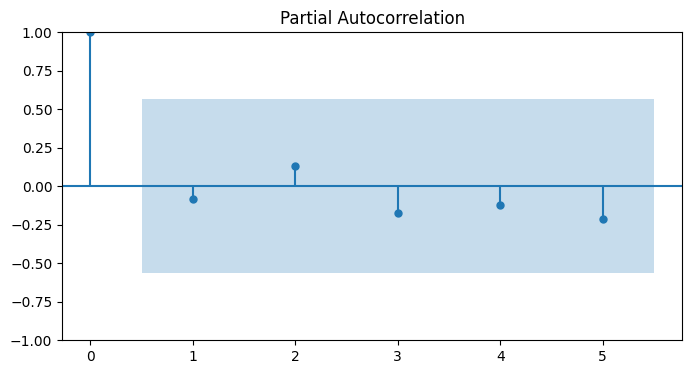

In [63]:
train_df.index = pd.DatetimeIndex(train_df.index.values,
                               freq=train_df.index.inferred_freq) 
model = sm.tsa.ARIMA(train_df, order=(1, 1, 1))
result = model.fit() 
print(result.summary())

#Calculate autocorrelation and partial autocorrelation coefficients
acf = sm.tsa.stattools.acf(result.resid)
pacf = sm.tsa.stattools.pacf(result.resid)

#Plot autocorrelation and partial autocorrelation functions
sm.graphics.tsa.plot_acf(acf, lags=5)
sm.graphics.tsa.plot_pacf(pacf,method='ywm', lags=5);

In [64]:
# generate forecasts
forecasts = result.forecast(steps=10)

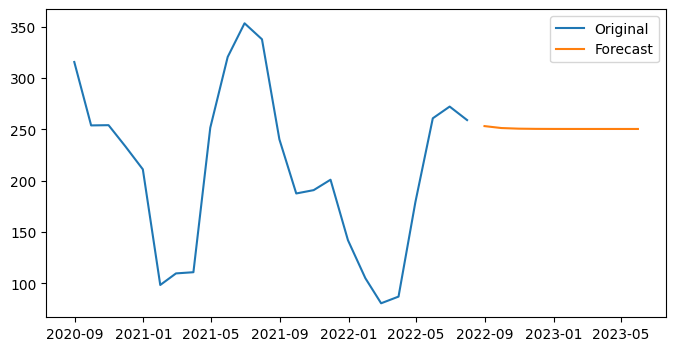

In [65]:
predictions = result.predict(start=test_df.index[0], end=test_df.index[-1], dynamic=True)

#plot original data and forecasts
plt.plot(train_df, label='Original')
plt.plot(forecasts, label='Forecast')
plt.legend()
plt.show()

# SARIMA MODEL

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#Build the SARIMA model
sarima_model = SARIMAX(train_df, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

#Fit the model
results = sarima_model.fit()

#Print the model summary
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                AQI   No. Observations:                   24
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -51.114
Date:                            Thu, 04 May 2023   AIC                            112.228
Time:                                    11:51:05   BIC                            114.218
Sample:                                08-31-2020   HQIC                           110.974
                                     - 07-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8221      0.325     -2.530      0.011      -1.459      -0.185
ma.L1          0.3988      0.481   

c:\Users\Satheesh Bhukya\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


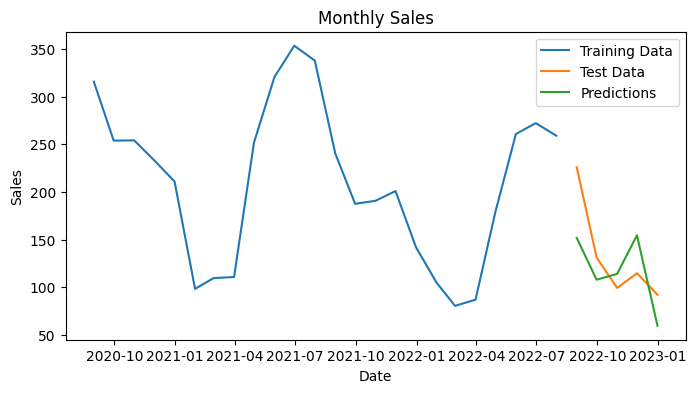

MSE: 1779.452635104828
MAE: 36.88986407906039
MAPE: 0.2705687048166291


In [67]:
#Make predictions for the test data
predictions = results.predict(start=len(train_df), end=len(train_df)+len(test_df)-1, dynamic=False)

#Visualize the actual and predicted sales
plt.plot(train_df, label='Training Data')
plt.plot(test_df, label='Test Data')
plt.plot(predictions, label='Predictions')
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

#Calculate the root mean squared error (RMSE) to evaluate the model
mse = mean_squared_error(test_df, predictions) 
mae = mean_absolute_error(test_df, predictions) 
mape=mean_absolute_percentage_error(test_df,predictions)
print('MSE:', mse)
print('MAE:', mae) 
print('MAPE:', mape) 


# FACEBOOK PROPHET 

In [68]:
import logging 
from prophet import Prophet

In [69]:
train_df=df.reset_index() # converted to prophet format 
train_df.columns=['ds','y']
train_df['ds']=train_df['ds'].dt.tz_localize(None) 
train_df.tail()

,ds,y
24,2022-08-31,225.930172
25,2022-09-30,131.240000
26,2022-10-31,99.324167
27,2022-11-30,114.814583
28,2022-12-31,92.233333


In [70]:
prediction_size=28  

m=Prophet()
m.fit(train_df)


11:51:14 - cmdstanpy - INFO - Chain [1] start processing
11:51:14 - cmdstanpy - INFO - Chain [1] done processing


In [71]:
future=m.make_future_dataframe(periods=prediction_size) 
future.tail(n=3)


,ds
54,2023-01-26
55,2023-01-27
56,2023-01-28


In [72]:
forecast=m.predict(future) 
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
52,2023-01-24,148.674236,788.398027,818.473961,148.674094,148.674394,655.022278,655.022278,655.022278,655.022278,655.022278,655.022278,0.0,0.0,0.0,803.696514
53,2023-01-25,148.521034,701.759096,730.720335,148.520874,148.521205,567.754940,567.754940,567.754940,567.754940,567.754940,567.754940,0.0,0.0,0.0,716.275974
54,2023-01-26,148.367832,605.394525,633.955480,148.367658,148.368017,471.253287,471.253287,471.253287,471.253287,471.253287,471.253287,0.0,0.0,0.0,619.621119
55,2023-01-27,148.214629,500.622296,530.975999,148.214442,148.214829,367.181329,367.181329,367.181329,367.181329,367.181329,367.181329,0.0,0.0,0.0,515.395958
56,2023-01-28,148.061427,391.288360,420.674899,148.061229,148.061641,257.359464,257.359464,257.359464,257.359464,257.359464,257.359464,0.0,0.0,0.0,405.420891


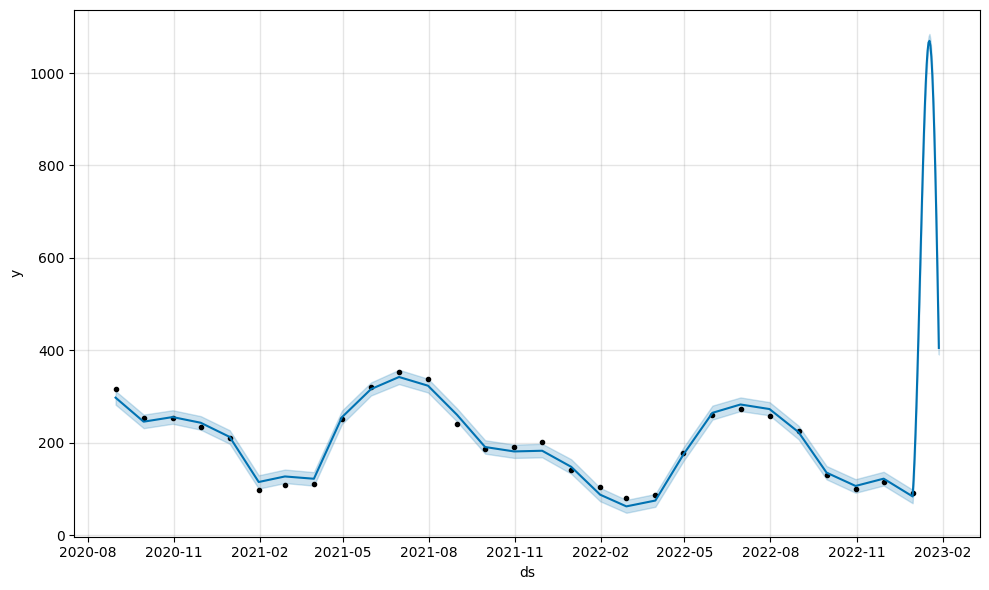

In [73]:
m.plot(forecast);

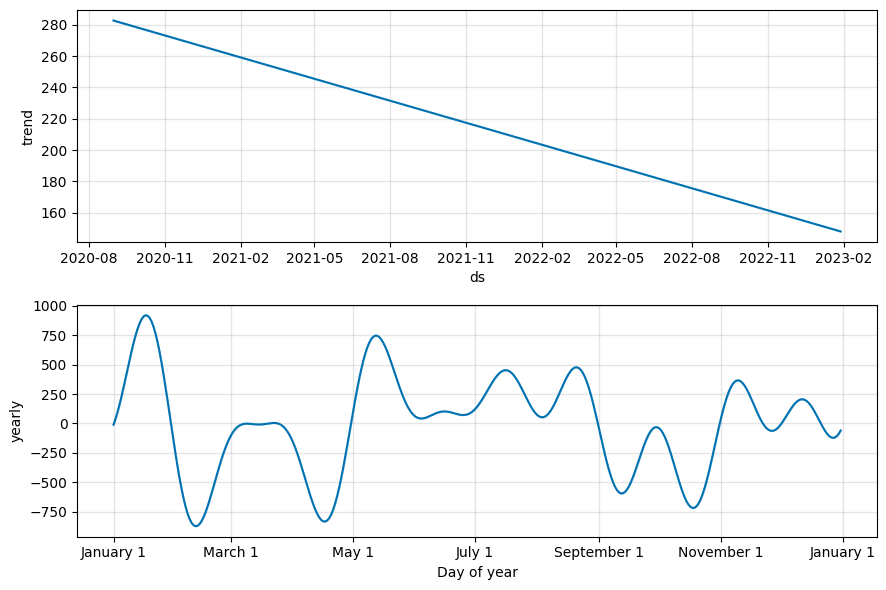

In [74]:
m.plot_components(forecast);

In [75]:
actual = train_df['y'].values[-28:]
predicted = forecast['yhat'].values[-28:]

In [76]:
mse = mean_squared_error(actual, predicted)
mae = mean_absolute_error(actual, predicted) 
mape=mean_absolute_percentage_error(actual,predicted)

print('MSE: %.3f' % mse)
print('MAE: %.3f' % mae) 
print('MAPE:%.3f' % mape)

MSE: 361140.536
MAE: 528.989
MAPE:3.576


#SARIMAX MODEL IS USED RATHER THAN PROPHET 

#AS MSE,MAE,MAPE VALUES ARE LESSER FOR SARIMAX MODEL. 

#SO, FOR EVALUATING WE CAN USE SARIMAX MODEL 
